### Exploracion con Dataframe limpio y categorias correctas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from IPython.display import HTML

In [2]:
def poner_fecha_string(df, date_string):
    date_obj = pd.to_datetime(date_string)
    df['fecha'] = date_obj


def agregar_sucursales(df, sucursales_df):
    for _, row in sucursales_df.iterrows():

        mascara = df['id_sucursal'] == row['id_sucursal']
        df.loc[mascara, 'sucursal_nombre'] = row['sucursales_nombre']
        df.loc[mascara, 'sucursal_tipo'] = row['sucursales_tipo']
        df.loc[mascara, 'sucursal_calle'] = row['sucursales_calle']
        df.loc[mascara, 'sucursal_latitud'] = row['sucursales_latitud']
        df.loc[mascara, 'sucursal_longitud'] = row['sucursales_longitud']
        df.loc[mascara, 'sucursal_barrio'] = row['sucursales_barrio']
        df.loc[mascara, 'sucursal_localidad'] = row['sucursales_localidad']
        df.loc[mascara, 'sucursal_provincia'] = row['sucursales_provincia']

    display(HTML(f"<span style='color: green;'> Datos de sucursales cargados exitosamente.</span>"))


def agregar_columnas_cambio_precio(df):
    df_ordenado = df.sort_values(by='fecha', ascending=True)
    df_X_producto_sucursal = df_ordenado.groupby(['id_producto', 'id_sucursal'])

    df['productos_diferencia_precio_fecha_anterior'] = df_X_producto_sucursal['productos_precio_lista'].diff()
    df['productos_diferencia_precio_fecha_anterior'] = df['productos_diferencia_precio_fecha_anterior'].fillna(0) # se reemplaza el NaN por 0 para evitar que cuente como un cambio de precio
    df['hubo_cambio_precio_fecha_anterior'] = df['productos_diferencia_precio_fecha_anterior'].ne(0) 


In [3]:
# Cargar de dataframe con las sucursales
sucursales_df = pd.DataFrame()


# ultimo archivo de sucursales subido 
sucursales_path = "datos/7_4_25-sepa_lunes/2025-04-07/sepa_1_comercio-sepa-10_2025-04-07_09-05-10/sucursales.csv" 

sucursales_df = pd.read_csv(sucursales_path, sep='|', header=0)

# Eliminar la última fila ya que contine una anotacion la 
# fecha de la utlima actualizacion del archivo
sucursales_df = sucursales_df.iloc[:-1, :]



In [4]:
# Leer el archivo Parquet con categorias creadas adecuadamente
dataset_path = "datos/parquets/productos_total_corregido.parquet"
df_parquet = pd.read_parquet(dataset_path)

In [5]:
# agregar sucursarles y columnas de cambios al dataframe parquet

agregar_sucursales(df_parquet, sucursales_df)
agregar_columnas_cambio_precio(df_parquet)

In [6]:
# eliminar filas con id_bandera nulo (pies de paginas de los datasets)
df_parquet = df_parquet[~df_parquet['id_bandera'].isna()]

# eliminar columnas conocidas como innecesarias
df_parquet.drop(columns=["productos_precio_unitario_promo2","productos_leyenda_promo2"], inplace=True)

In [7]:

tipos_de_datos = {
    "id_comercio": str, # texto, dado que no se hacen operaciones con este campo
    "id_bandera": np.int64,
    "id_sucursal": np.int64,
    "id_producto": np.int64,
    "productos_ean": np.int64,
    "productos_descripcion": str,
    "productos_cantidad_presentacion": np.float64,
    "productos_unidad_medida_presentacion": str,
    "productos_marca": str,
    "productos_precio_lista": np.float64,
    "productos_precio_referencia": np.float64,
    "productos_cantidad_referencia": np.float64,
    "productos_unidad_medida_referencia": str,
    "productos_precio_unitario_promo1": np.float64,
    "productos_leyenda_promo1": str,
    "fecha" : 'datetime64[ns]',
    "categoria_predicha" : 'category',
    "sucursal_nombre" : str,
    "sucursal_tipo" : 'category',
    "sucursal_calle" : 'category',
    "sucursal_latitud" : np.float64,
    "sucursal_longitud" : np.float64,
    "sucursal_barrio" : 'category',
    "sucursal_localidad" : 'category',
    "sucursal_provincia" : 'category',
    "productos_diferencia_precio_fecha_anterior" : np.float64,
    "hubo_cambio_precio_fecha_anterior" : bool,
}
df_parquet = df_parquet.astype(tipos_de_datos)
df_parquet.dtypes

id_comercio                                           object
id_bandera                                             int64
id_sucursal                                            int64
id_producto                                            int64
productos_ean                                          int64
productos_descripcion                                 object
productos_cantidad_presentacion                      float64
productos_unidad_medida_presentacion                  object
productos_marca                                       object
productos_precio_lista                               float64
productos_precio_referencia                          float64
productos_cantidad_referencia                        float64
productos_unidad_medida_referencia                    object
productos_precio_unitario_promo1                     float64
productos_leyenda_promo1                              object
fecha                                         datetime64[ns]
categoria_predicha      

In [10]:
df_parquet.head(10)

,id_comercio,id_bandera,id_sucursal,id_producto,productos_ean,productos_descripcion,productos_cantidad_presentacion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,...,sucursal_nombre,sucursal_tipo,sucursal_calle,sucursal_latitud,sucursal_longitud,sucursal_barrio,sucursal_localidad,sucursal_provincia,productos_diferencia_precio_fecha_anterior,hubo_cambio_precio_fecha_anterior
0,10,1.0,63.0,7.790771e+12,1.0,toalla nosotras clasicas c calendula x 16u,1.0,UNI,NOSOTRAS,2709.0,...,Caleta Olivia,Hipermercado,Humberto Beghin,-46.444906,-67.533789,NaN,Santa Cruz,AR-Z,0.0,False
1,10,3.0,711.0,7.790070e+12,1.0,fideos dedalitos lucchetti bolsa x 500 grs,1.0,UNI,LUCCHETTI,1339.0,...,Álvarez Thomas 372,Autoservicio,Av. Álvarez Thomas,-34.581280,-58.449050,Colegiales,Ciudad Autónoma de Buenos Aires,AR-C,0.0,False
2,10,1.0,44.0,7.622202e+12,1.0,galletitas boca de dama terrabusi x 170 grs,1.0,UNI,TERRABUSI,959.0,...,Resistencia II,Hipermercado,Av. Ávalos,-27.438800,-58.987383,NaN,Resistencia,AR-H,0.0,False
3,10,2.0,62.0,7.791293e+12,1.0,acondicionador liso efecto botox tresemme x 25...,1.0,UNI,TRESEMME,3969.0,...,Champagnat,Hipermercado,Panamericana Ramal Pilar,-34.449813,-58.916319,NaN,Pilar,AR-B,0.0,False
4,10,1.0,2.0,7.791720e+12,1.0,anana en rodajas bulnez lata x 825 grs,1.0,UNI,BULNEZ,2990.0,...,Vicente López,Hipermercado,Av. del Libertador,-34.532302,-58.468176,NaN,Vicente López,AR-B,0.0,False
5,10,2.0,130.0,7.798152e+12,1.0,mani tostado con cascara king x 175 grs,1.0,UNI,KING,1159.0,...,Mar del Plata Centro,Supermercado,Catamarca,-37.998923,-57.553648,NaN,Mar del Plata,AR-B,0.0,False
6,10,3.0,438.0,7.791293e+12,1.0,shampoo ceramidas sedal x 340 cc,1.0,UNI,SEDAL,4090.0,...,25 de Mayo 2650,Supermercado,25 de Mayo,-34.500302,-58.694886,NaN,Los Polvorines,AR-B,0.0,False
7,10,2.0,290.0,7.790071e+12,1.0,infusion a base de cafe arlistan pet x 170 grs,1.0,UNI,ARLISTAN,7650.0,...,Mendoza Bombal,Supermercado,Beltrán,-32.903094,-68.852428,NaN,Godoy Cruz,AR-M,0.0,False
8,10,3.0,482.0,7.798108e+12,1.0,atun al natural lomitos carrefour lata x 354 grs,1.0,UNI,CARREFOUR,5190.0,...,Sullivan 1597,Autoservicio,Alejandro Sullivan,-34.657250,-58.710554,NaN,San Antonio de Padua,AR-B,0.0,False
9,10,2.0,272.0,7.790991e+12,1.0,lavavajilla limon zorro botella x 500 cc,1.0,UNI,ZORRO,2099.0,...,San Fernando II,Supermercado,Av. Pdte. Tte. Gral. J. D. Perón,-34.441795,-58.553738,NaN,San Fernando,AR-B,0.0,False


## ¿Cuáles son los productos que más cambian de precio según el día de la semana? 
1. separar/agrupar por fecha e id_producto (independiente de el tipo de sucursal, barrio, provincia, entre otros factores)
3. obtener la desviacion estandar de cada grupo 
4. ordenar y obtener el los productos con mayor valor

In [104]:
# df_parquet.groupby(['fecha', 'id_sucursal', 'id_producto'])['productos_precio_lista'].sum().sort_values(ascending=False).head(10)
p1_df = df_parquet.groupby(['fecha','id_producto'], as_index=False).agg({
    'productos_descripcion': 'first',
    'categoria_predicha':'first',
    'hubo_cambio_precio_fecha_anterior': 'sum',
    'productos_precio_lista': 'std',
}).rename(columns={
    'productos_precio_lista': 'precio_lista_std', 
    'hubo_cambio_precio_fecha_anterior':'conteo_cambio_fecha'
})



In [94]:
p1_df.sort_values(by='conteo_cambio_fecha',ascending=False).head(10)

,fecha,id_producto,productos_descripcion,categoria_predicha,conteo_cambio_fecha,precio_lista_std
22799,2025-04-02,7791250001529,espumante extra brut navarro correas x 750 cc,Electrodomesticos,564,164.845907
20362,2025-04-02,7790168904328,vino tinto dulce selecto colon bot x 750 cc,Alimentos y bebidas,559,0.000000
20488,2025-04-02,7790240128673,vino tinto malbec reserva fond de cave x 750 cc,Alimentos y bebidas,559,181.630906
67625,2025-04-05,7790070760722,vino tinto malbec emilia x 750 cc,Alimentos y bebidas,557,31.123540
68058,2025-04-05,7790189021011,vino tinto cabernet sauvignon elementos x 750 cc,Alimentos y bebidas,557,17.270961
68111,2025-04-05,7790240042092,vino tinto syrah alma mora x 750 cc,Alimentos y bebidas,554,32.299576
25406,2025-04-02,7792319972231,vino tinto cosecha tardia norton x 750 cc,Alimentos y bebidas,553,46.524138
68059,2025-04-05,7790189021028,vino tinto malbec elementos x 750 cc,Alimentos y bebidas,553,17.344604
25407,2025-04-02,7792319972248,vino rosado cosecha tardia norton x 750 cc,Alimentos y bebidas,552,46.482583
59643,2025-04-04,7798033337851,dulce de batata classic 500 grs,Electrodomesticos,550,72.377975


In [95]:
p1_df.sort_values(by='precio_lista_std',ascending=False).head(10)


,fecha,id_producto,productos_descripcion,categoria_predicha,conteo_cambio_fecha,precio_lista_std
111194,2025-04-07,8806086889957,microondas samsung mg23f3k3tak bg negro,Electrodomesticos,0,95122.259926
15790,2025-04-01,8806086889957,microondas samsung mg23f3k3tak bg negro,Electrodomesticos,0,95122.259926
47579,2025-04-03,8806086889957,microondas samsung mg23f3k3tak bg negro,Electrodomesticos,0,95122.259926
31741,2025-04-02,8806086889957,microondas samsung mg23f3k3tak bg negro,Electrodomesticos,0,95122.259926
79335,2025-04-05,8806086889957,microondas samsung mg23f3k3tak bg negro,Electrodomesticos,0,95122.259926
95249,2025-04-06,8806086889957,microondas samsung mg23f3k3tak bg negro,Electrodomesticos,0,95122.259926
63445,2025-04-04,8806086889957,microondas samsung mg23f3k3tak bg negro,Electrodomesticos,0,95122.259926
91352,2025-04-06,7798013732744,cocina escorial 51cm candor negra gn,Electrodomesticos,0,75936.837327
79336,2025-04-05,8806086889964,microondas samsung mg23f3k3tas bg silver,Electrodomesticos,0,75207.580735
63446,2025-04-04,8806086889964,microondas samsung mg23f3k3tas bg silver,Electrodomesticos,0,75207.580735


## visualizacion por categorias

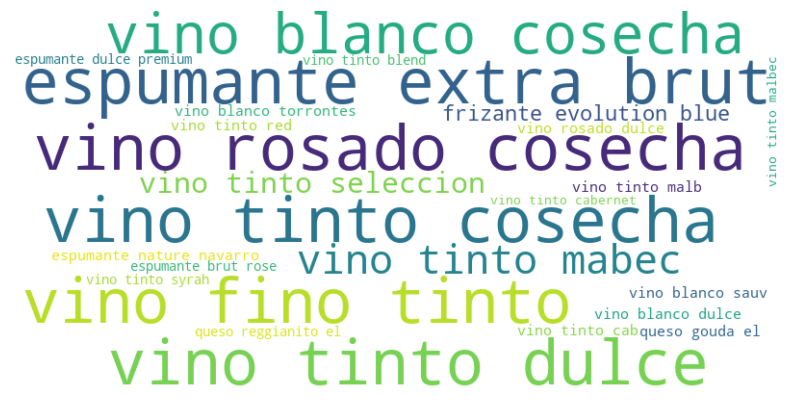

In [ ]:
# nube de palabras para visualizar las categorias que mas cambian (fecha: '2025-04-02')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# limpiar la cadena de texto
nube_df = p1_df.copy()

nube_df['fecha'] = pd.to_datetime(nube_df['fecha'])
nube_df = nube_df[nube_df['fecha'] == '2025-04-02']
nube_df = nube_df.groupby('productos_descripcion')['conteo_cambio_fecha'].sum().sort_values(ascending=False).head(50)
nube_df.index = nube_df.index.str.split().str[:3].str.join(' ') #recortar cada nombre a 3 palabras
conteos_como_frecuencias = nube_df.to_dict()


# WordCloud con generate_from_frequencies
nube = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(conteos_como_frecuencias)


plt.figure(figsize=(10, 5))
plt.imshow(nube, interpolation='bilinear')
plt.axis('off')
plt.show()

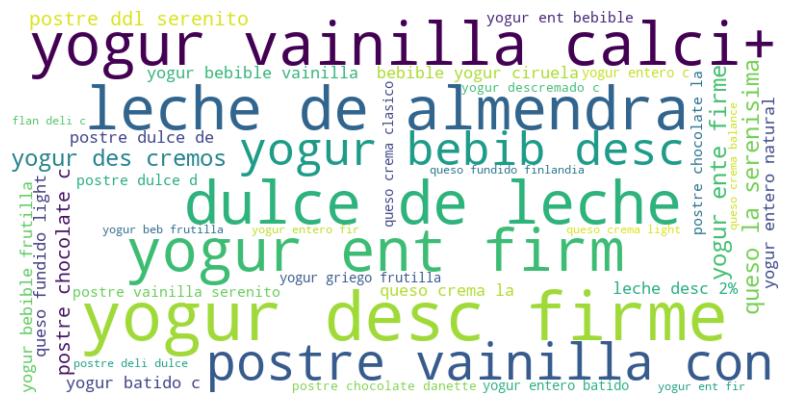

In [ ]:
# nube de palabras para visualizar las categorias que mas cambian (fecha: '2025-04-01')

nube_df = p1_df.copy()

nube_df['fecha'] = pd.to_datetime(nube_df['fecha'])
nube_df = nube_df[nube_df['fecha'] == '2025-04-03']
nube_df = nube_df.groupby('productos_descripcion')['conteo_cambio_fecha'].sum().sort_values(ascending=False).head(50)
nube_df.index = nube_df.index.str.split().str[:3].str.join(' ') #recortar cada nombre a 3 palabras
conteos_como_frecuencias = nube_df.to_dict()


# WordCloud con generate_from_frequencies
nube = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(conteos_como_frecuencias)


plt.figure(figsize=(10, 5))
plt.imshow(nube, interpolation='bilinear')
plt.axis('off')
plt.show()

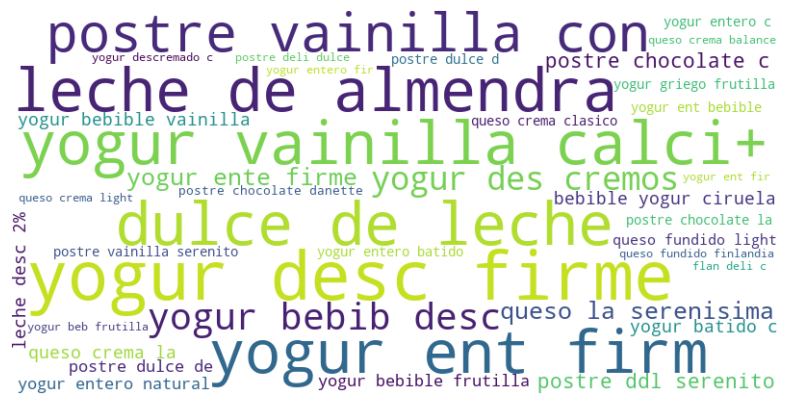

In [ ]:
# nube de palabras para visualizar las categorias que mas cambian (fecha: '2025-04-03')
nube_df = p1_df.copy()

nube_df['fecha'] = pd.to_datetime(nube_df['fecha'])
nube_df = nube_df[nube_df['fecha'] == '2025-04-03']
nube_df = nube_df.groupby('productos_descripcion')['conteo_cambio_fecha'].sum().sort_values(ascending=False).head(50)
nube_df.index = nube_df.index.str.split().str[:3].str.join(' ') #recortar cada nombre a 3 palabras
conteos_como_frecuencias = nube_df.to_dict()


# WordCloud con generate_from_frequencies
nube = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(conteos_como_frecuencias)


plt.figure(figsize=(10, 5))
plt.imshow(nube, interpolation='bilinear')
plt.axis('off')
plt.show()

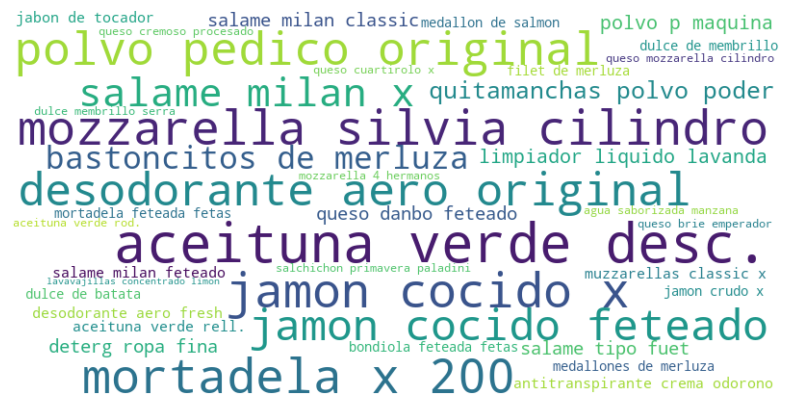

In [ ]:
# nube de palabras para visualizar las categorias que mas cambian (fecha: '2025-04-04')
nube_df = p1_df.copy()

nube_df['fecha'] = pd.to_datetime(nube_df['fecha'])
nube_df = nube_df[nube_df['fecha'] == '2025-04-04']
nube_df = nube_df.groupby('productos_descripcion')['conteo_cambio_fecha'].sum().sort_values(ascending=False).head(50)
nube_df.index = nube_df.index.str.split().str[:3].str.join(' ') #recortar cada nombre a 3 palabras
conteos_como_frecuencias = nube_df.to_dict()


# WordCloud con generate_from_frequencies
nube = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(conteos_como_frecuencias)


plt.figure(figsize=(10, 5))
plt.imshow(nube, interpolation='bilinear')
plt.axis('off')
plt.show()

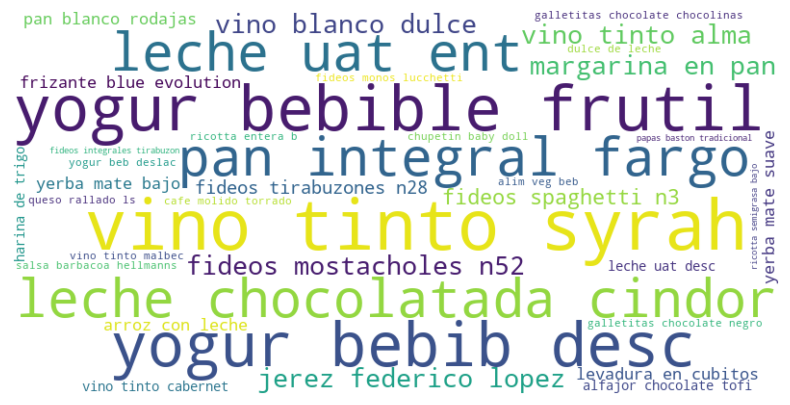

In [ ]:
# nube de palabras para visualizar las categorias que mas cambian (fecha: '2025-04-05')
nube_df = p1_df.copy()

nube_df['fecha'] = pd.to_datetime(nube_df['fecha'])
nube_df = nube_df[nube_df['fecha'] == '2025-04-05']
nube_df = nube_df.groupby('productos_descripcion')['conteo_cambio_fecha'].sum().sort_values(ascending=False).head(50)
nube_df.index = nube_df.index.str.split().str[:3].str.join(' ') #recortar cada nombre a 3 palabras
conteos_como_frecuencias = nube_df.to_dict()


# WordCloud con generate_from_frequencies
nube = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(conteos_como_frecuencias)


plt.figure(figsize=(10, 5))
plt.imshow(nube, interpolation='bilinear')
plt.axis('off')
plt.show()

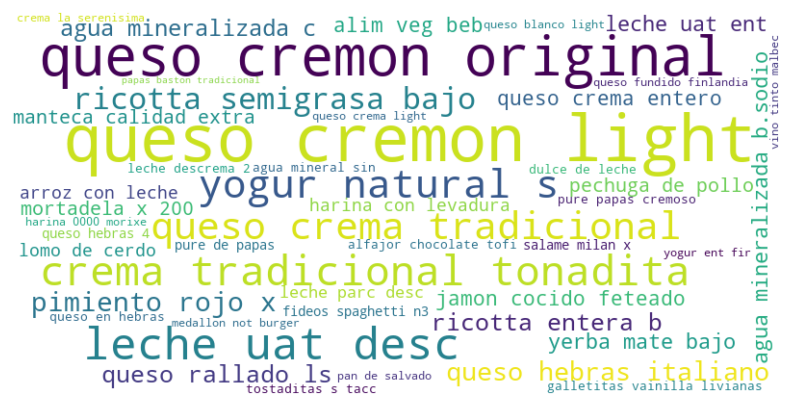

In [ ]:
# nube de palabras para visualizar las categorias que mas cambian (fecha: '2025-04-06')
nube_df = p1_df.copy()

nube_df['fecha'] = pd.to_datetime(nube_df['fecha'])
nube_df = nube_df[nube_df['fecha'] == '2025-04-06']
nube_df = nube_df.groupby('productos_descripcion')['conteo_cambio_fecha'].sum().sort_values(ascending=False).head(50)
nube_df.index = nube_df.index.str.split().str[:3].str.join(' ') #recortar cada nombre a 3 palabras
conteos_como_frecuencias = nube_df.to_dict()


# WordCloud con generate_from_frequencies
nube = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(conteos_como_frecuencias)


plt.figure(figsize=(10, 5))
plt.imshow(nube, interpolation='bilinear')
plt.axis('off')
plt.show()

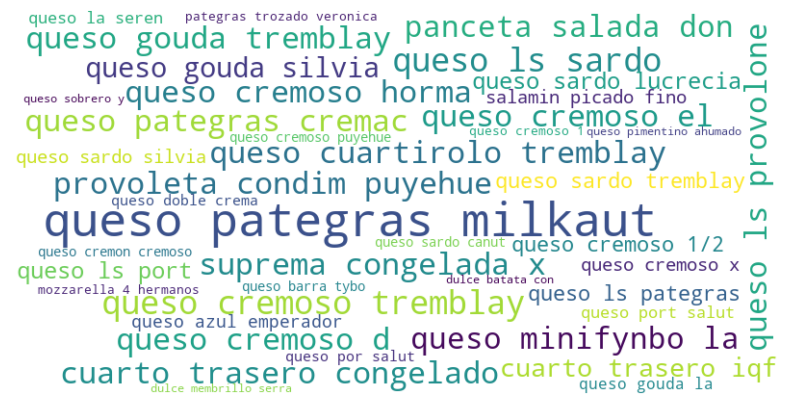

In [169]:
# nube de palabras para visualizar las categorias que mas cambian (fecha: '2025-04-07')
nube_df = p1_df.copy()

nube_df['fecha'] = pd.to_datetime(nube_df['fecha'])
nube_df = nube_df[nube_df['fecha'] == '2025-04-07']
nube_df = nube_df.groupby('productos_descripcion')['conteo_cambio_fecha'].sum().sort_values(ascending=False).head(50)
nube_df.index = nube_df.index.str.split().str[:3].str.join(' ') #recortar cada nombre a 3 palabras
conteos_como_frecuencias = nube_df.to_dict()

# WordCloud con generate_from_frequencies
nube = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(conteos_como_frecuencias)

plt.figure(figsize=(10, 5))
plt.imshow(nube, interpolation='bilinear')
plt.axis('off')
plt.show()


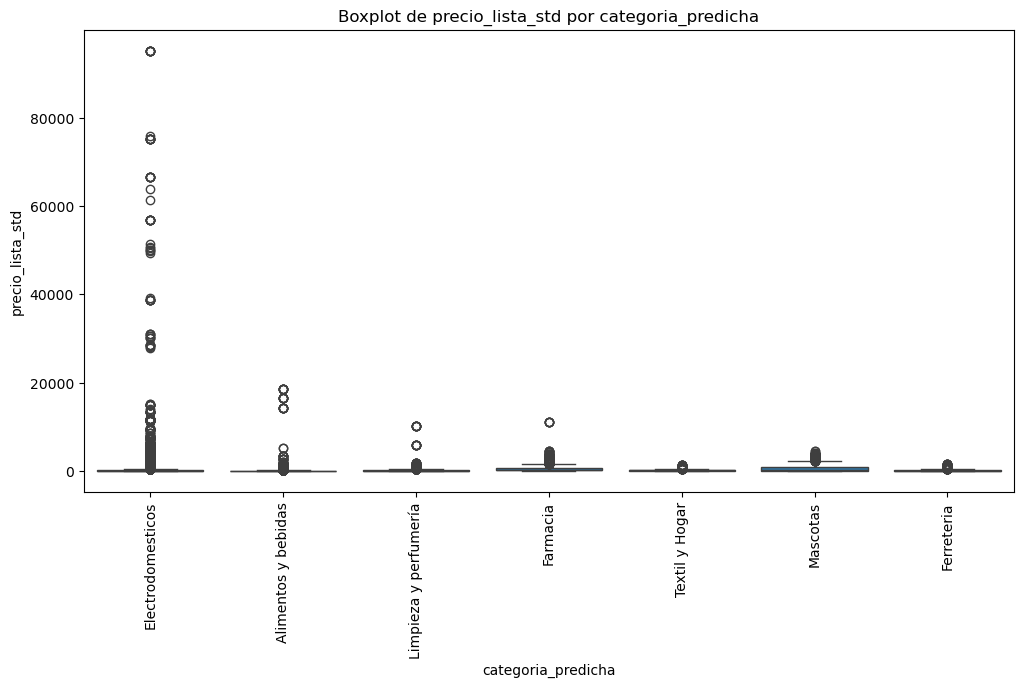

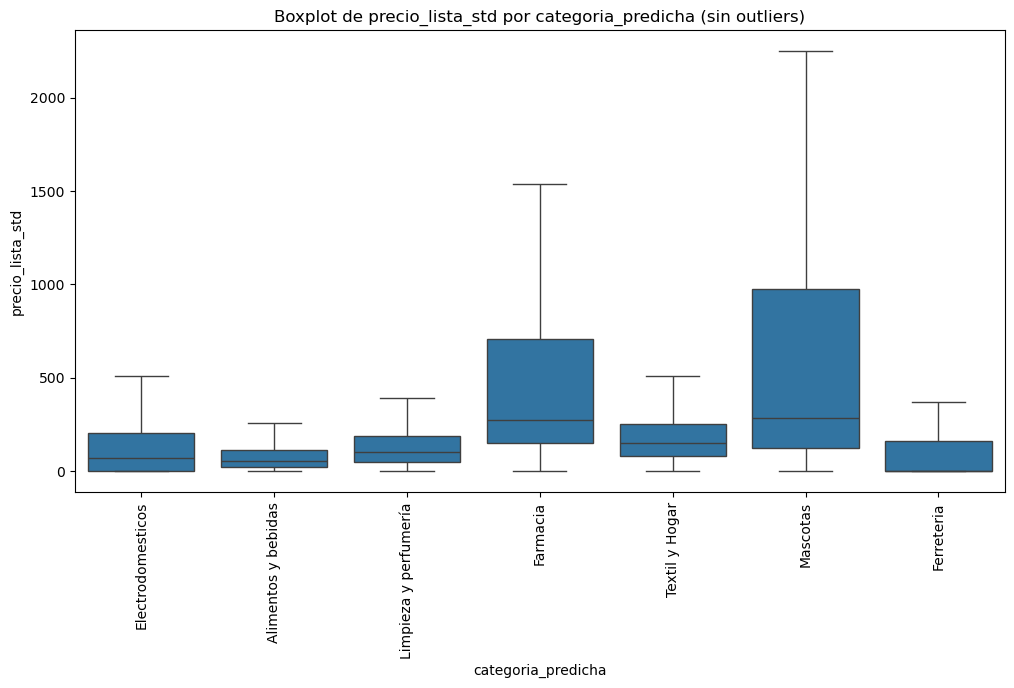

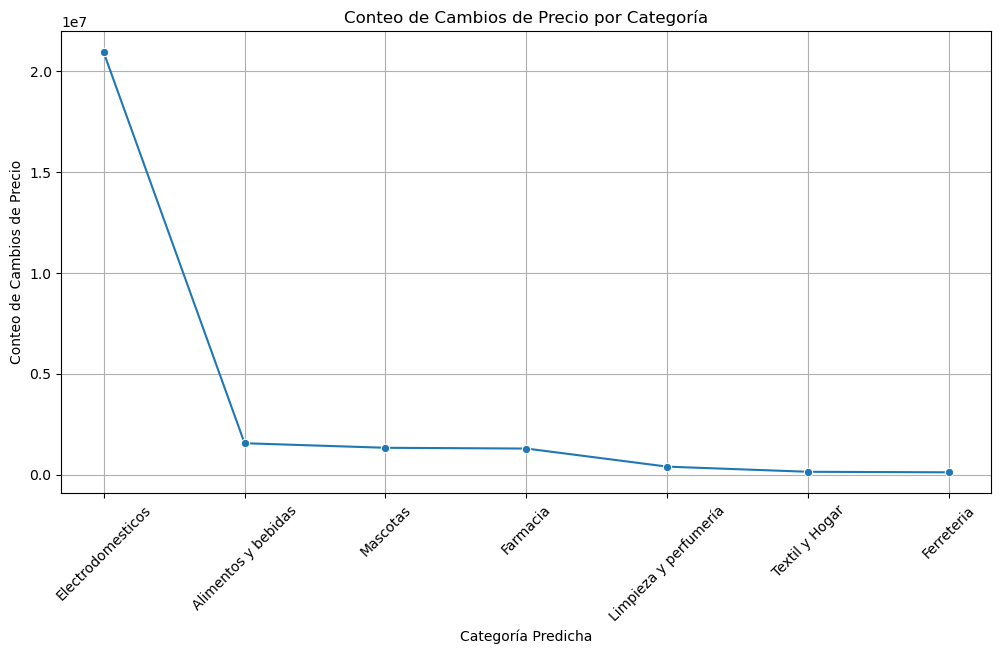

In [125]:
# Boxplot por categoria_predicha
plt.figure(figsize=(12, 6))
sns.boxplot(x='categoria_predicha', y='precio_lista_std', data=p1_df)
plt.title('Boxplot de precio_lista_std por categoria_predicha')
plt.xlabel('categoria_predicha')
plt.ylabel('precio_lista_std')
plt.xticks(rotation=90)
plt.show()

# Boxplot por categoria_predicha
plt.figure(figsize=(12, 6))
sns.boxplot(x='categoria_predicha', y='precio_lista_std', data=p1_df, showfliers=False)
plt.title('Boxplot de precio_lista_std por categoria_predicha (sin outliers)')
plt.xlabel('categoria_predicha')
plt.ylabel('precio_lista_std')
plt.xticks(rotation=90)
plt.show()

precio_lista_std_por_categoria = p1_df.groupby('categoria_predicha')['precio_lista_std'].sum().reset_index()
precio_lista_std_por_categoria.sort_values(by='precio_lista_std', ascending=False, inplace=True)

# Crear el gráfico de línea
plt.figure(figsize=(12, 6))
sns.lineplot(data=precio_lista_std_por_categoria, x='categoria_predicha', y='precio_lista_std', marker='o')
plt.title('Conteo de Cambios de Precio por Categoría')
plt.xlabel('Categoría Predicha')
plt.ylabel('Conteo de Cambios de Precio')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

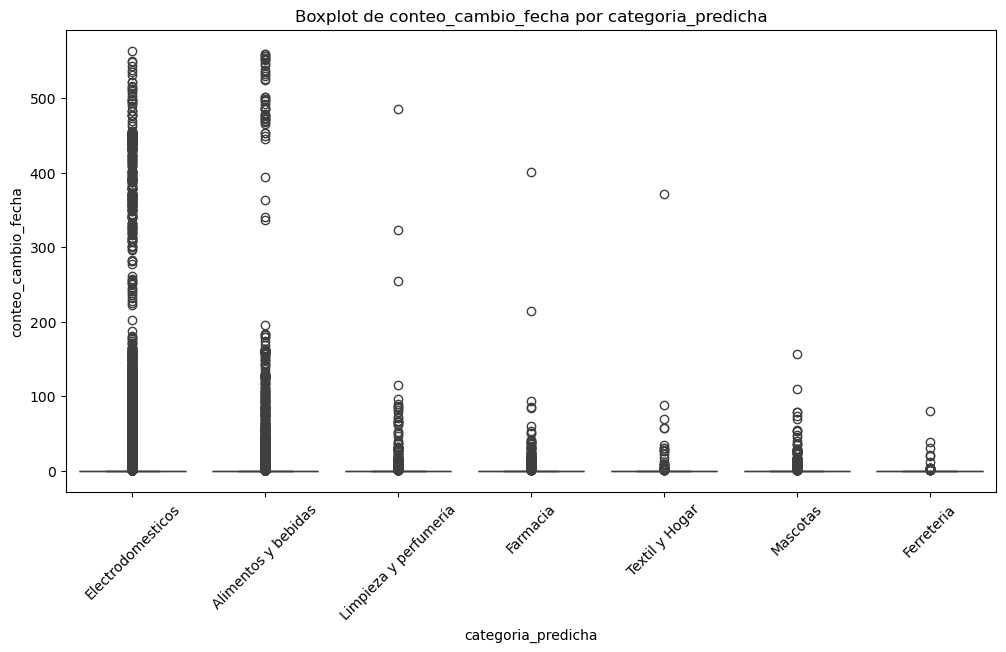

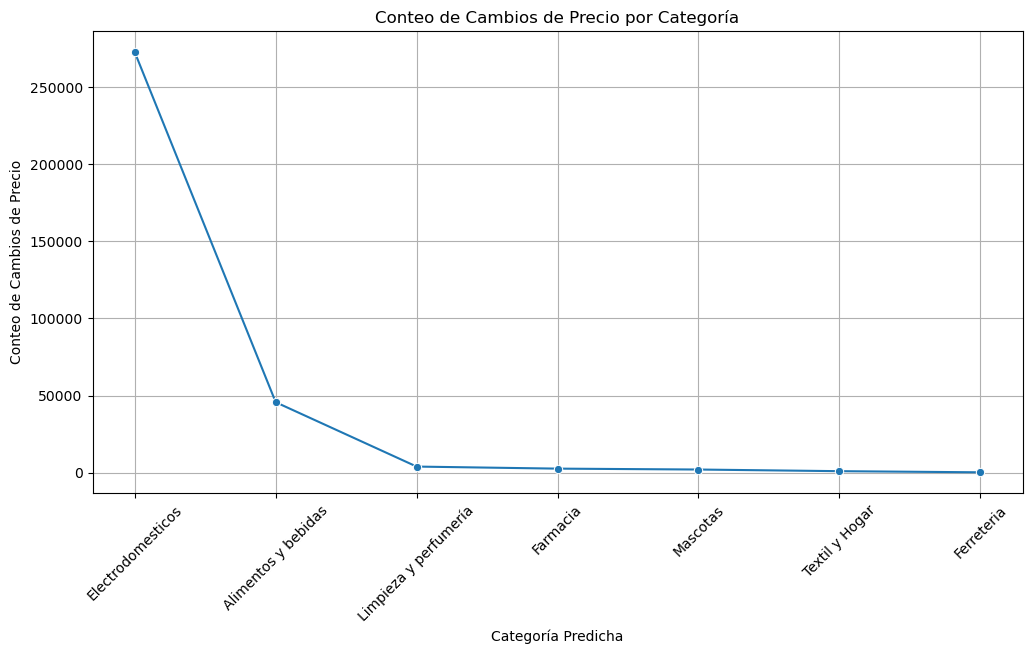

In [123]:
# Agrupar por 'categoria_predicha' y sumar 'conteo_cambio_fecha'
conteo_cambio_por_categoria = p1_df.groupby('categoria_predicha')['conteo_cambio_fecha'].sum().reset_index()
conteo_cambio_por_categoria.sort_values(by='conteo_cambio_fecha', ascending=False, inplace=True)

# Boxplot por categoria_predicha
plt.figure(figsize=(12, 6))
sns.boxplot(x='categoria_predicha', y='conteo_cambio_fecha', data=p1_df)
plt.title('Boxplot de conteo_cambio_fecha por categoria_predicha')
plt.xlabel('categoria_predicha')
plt.ylabel('conteo_cambio_fecha')
plt.xticks(rotation=45)
plt.show()

# Crear el gráfico de línea
plt.figure(figsize=(12, 6))
sns.lineplot(data=conteo_cambio_por_categoria, x='categoria_predicha', y='conteo_cambio_fecha', marker='o')
plt.title('Conteo de Cambios de Precio por Categoría')
plt.xlabel('Categoría Predicha')
plt.ylabel('Conteo de Cambios de Precio')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



In [101]:
p1_df = df_parquet.groupby(['categoria_predicha'], as_index=False).agg({
    # 'productos_descripcion': 'first',
    'hubo_cambio_precio_fecha_anterior': 'sum',
    'productos_precio_lista': 'std',
}).rename(columns={
    'productos_precio_lista': 'precio_lista_std', 
    'hubo_cambio_precio_fecha_anterior':'conteo_cambio_fecha'
})

In [102]:
p1_df.sort_values(by='conteo_cambio_fecha',ascending=False).head(10)


,categoria_predicha,conteo_cambio_fecha,precio_lista_std
1,Electrodomesticos,272564,84304.892026
0,Alimentos y bebidas,45675,5365.367265
4,Limpieza y perfumería,3949,3352.411336
2,Farmacia,2619,10362.998990
5,Mascotas,2035,8601.928864
6,Textil y Hogar,970,3906.630303
3,Ferreteria,234,406516.235752


In [103]:
p1_df.sort_values(by='precio_lista_std',ascending=False).head(10)


,categoria_predicha,conteo_cambio_fecha,precio_lista_std
3,Ferreteria,234,406516.235752
1,Electrodomesticos,272564,84304.892026
2,Farmacia,2619,10362.998990
5,Mascotas,2035,8601.928864
0,Alimentos y bebidas,45675,5365.367265
6,Textil y Hogar,970,3906.630303
4,Limpieza y perfumería,3949,3352.411336


## ¿Existe un patrón de precios por región? (ejemplo: regiones o grupos de provincias del país con precios muy elevados) Elegir alguna de las

1. agrupar por barrios y por fechas 
2. obtener las dispersion por cada grupo

In [9]:
# df_parquet.groupby(['fecha', 'id_sucursal', 'id_producto'])['productos_precio_lista'].sum().sort_values(ascending=False).head(10)
p2_df = df_parquet.groupby(['sucursal_calle'], as_index=False).agg({
    'hubo_cambio_precio_fecha_anterior': 'sum',
    'productos_precio_lista': 'std',
}).rename(columns={
    'productos_precio_lista': 'precio_lista_std', 
    'hubo_cambio_precio_fecha_anterior':'conteo_cambio_fecha'
})

/tmp/ipykernel_359197/2227060038.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p2_df = df_parquet.groupby(['sucursal_calle'], as_index=False).agg({


In [191]:
df_parquet.groupby(['sucursal_calle'], as_index=False).agg({
    'hubo_cambio_precio_fecha_anterior': 'sum',
    'productos_precio_lista': 'std',
    'id_producto': 'count'  
}).rename(columns={
    'id_producto': 'cantidad_productos',
}).sort_values(by='productos_precio_lista' ,ascending=False).head(10)

,sucursal_calle,hubo_cambio_precio_fecha_anterior,productos_precio_lista,cantidad_productos
259,Jerónimo Salguero,1609,192686.800011,81183
58,Av. Constitución,1273,186127.328521,77791
109,Av. O'Higgins,1907,175240.350135,78051
34,Av. Acceso Este Lateral Sur,1476,174107.189462,75393
339,Ruta 202,1521,171869.785761,77767
179,Camino Gral. Belgrano,2205,167180.057845,111636
67,Av. Don Bosco,1389,165099.429053,71635
40,Av. Arturo Illia,1548,163716.665419,78311
180,Camino de Cintura,1421,157508.055424,71753
136,Av. del Libertador,3671,155340.270587,184096


In [192]:
df_parquet.groupby(['sucursal_localidad'], as_index=False).agg({
    'hubo_cambio_precio_fecha_anterior': 'sum',
    'productos_precio_lista': 'std',
    'id_producto': 'count'  
}).rename(columns={
    'id_producto': 'cantidad_productos',
}).sort_values(by='productos_precio_lista' ,ascending=False).head(10)

,sucursal_localidad,hubo_cambio_precio_fecha_anterior,productos_precio_lista,cantidad_productos
121,Villa Urquiza,1892,184547.943478,78100
113,Vicente López,2687,178499.344718,138851
48,Jardin Espinoza,1907,175240.350135,78051
43,Guaymallen,1476,174107.189462,75393
97,San Justo,1389,165099.429053,71635
60,Malvinas Argentinas,1548,163716.665419,78311
69,Monte Grande,1421,157508.055424,71753
99,San Martín,2213,145059.695483,112204
3,Adrogué,1955,139994.702662,99266
70,Moreno,1501,139905.770797,76504


In [193]:
df_parquet.groupby(['sucursal_tipo'], as_index=False).agg({
    'hubo_cambio_precio_fecha_anterior': 'sum',
    'productos_precio_lista': 'std',
    'id_producto': 'count'  
}).rename(columns={
    'id_producto': 'cantidad_productos',
}).sort_values(by='productos_precio_lista', ascending=False).head(10)

,sucursal_tipo,hubo_cambio_precio_fecha_anterior,productos_precio_lista,cantidad_productos
1,Hipermercado,110550,129975.099492,5514530
2,Supermercado,83970,37264.858466,4003444
0,Autoservicio,133526,4158.125980,6039342


### verificacion con estadistica inferencial

In [12]:
from scipy.stats import chi2_contingency

In [13]:
p2_df = df_parquet.copy()

p2_df['hubo_cambio_precio_fecha_anterior'] = p2_df['hubo_cambio_precio_fecha_anterior'].astype('category')

p2_df.loc[:,['hubo_cambio_precio_fecha_anterior', 'sucursal_tipo', 'sucursal_localidad', 'sucursal_barrio']]

,hubo_cambio_precio_fecha_anterior,sucursal_tipo,sucursal_localidad,sucursal_barrio
0,False,Hipermercado,Santa Cruz,NaN
1,False,Autoservicio,Ciudad Autónoma de Buenos Aires,Colegiales
2,False,Hipermercado,Resistencia,NaN
3,False,Hipermercado,Pilar,NaN
4,False,Hipermercado,Vicente López,NaN
...,...,...,...,...
15557318,False,Supermercado,Ciudad Autónoma de Buenos Aires,Villa Urquiza
15557319,False,Hipermercado,Zárate,NaN
15557320,False,Hipermercado,Salta,NaN
15557321,False,Hipermercado,Ciudad Autónoma de Buenos Aires,NaN


/tmp/ipykernel_359197/1983964149.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tabla = pd.pivot_table(


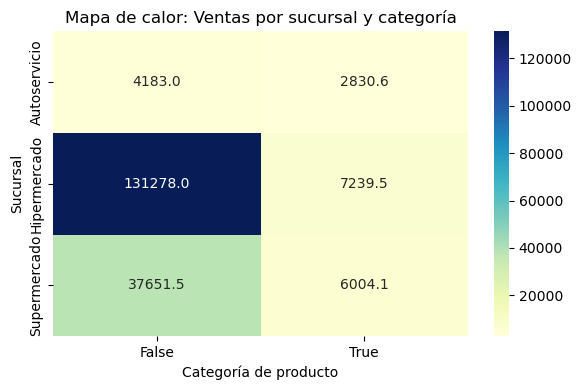

In [19]:
tabla = pd.pivot_table(
    p2_df,
    values='productos_precio_lista',              # variable de interés (numérica)
    index='sucursal_tipo',                      # variable para filas
    columns='hubo_cambio_precio_fecha_anterior',          # variable para columnas
    aggfunc='std',                         # qué hacer con los datos
    fill_value=0
)

plt.figure(figsize=(6, 4))
sns.heatmap(tabla, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Mapa de calor: Ventas por sucursal y categoría')
plt.xlabel('Categoría de producto')
plt.ylabel('Sucursal')
plt.tight_layout()
plt.show()


In [10]:
# sucursal_tipo vs hubo_cambio_precio_fecha_anterior

contingency = pd.crosstab(p2_df['sucursal_tipo'], p2_df['hubo_cambio_precio_fecha_anterior'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Resultado Test Chi-Cuadrado (sucursal_tipo vs hubo_cambio_precio_fecha_anterior): chi2={chi2:.2f}, p={p:.4f}")
if p <= 0.05:
    print("Rechazamos la hipótesis nula: hay una relación significativa entre sucursal_tipo y hubo_cambio_precio_fecha_anterior.")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia de una relación significativa entre sucursal_tipo y hubo_cambio_precio_fecha_anterior.")

Resultado Test Chi-Cuadrado (sucursal_tipo vs hubo_cambio_precio_fecha_anterior): chi2=597.20, p=0.0000
Rechazamos la hipótesis nula: hay una relación significativa entre sucursal_tipo y hubo_cambio_precio_fecha_anterior.


In [11]:
# sucursal_localidad vs hubo_cambio_precio_fecha_anterior

contingency = pd.crosstab(p2_df['sucursal_localidad'], p2_df['hubo_cambio_precio_fecha_anterior'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Resultado Test Chi-Cuadrado (sucursal_localidad vs hubo_cambio_precio_fecha_anterior): chi2={chi2:.2f}, p={p:.4f}")
if p <= 0.05:
    print("Rechazamos la hipótesis nula: hay una relación significativa entre sucursal_localidad y hubo_cambio_precio_fecha_anterior.")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia de una relación significativa entre sucursal_localidad y hubo_cambio_precio_fecha_anterior.")

Resultado Test Chi-Cuadrado (sucursal_localidad vs hubo_cambio_precio_fecha_anterior): chi2=16879.00, p=0.0000
Rechazamos la hipótesis nula: hay una relación significativa entre sucursal_localidad y hubo_cambio_precio_fecha_anterior.


In [15]:
# sucursal_barrio vs hubo_cambio_precio_fecha_anterior

contingency = pd.crosstab(p2_df['sucursal_barrio'], p2_df['hubo_cambio_precio_fecha_anterior'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Resultado Test Chi-Cuadrado (sucursal_barrio vs hubo_cambio_precio_fecha_anterior): chi2={chi2:.2f}, p={p:.16f}")
if p <= 0.05:
    print("Rechazamos la hipótesis nula: hay una relación significativa entre sucursal_barrio y hubo_cambio_precio_fecha_anterior.")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia de una relación significativa entre sucursal_barrio y hubo_cambio_precio_fecha_anterior.")

Resultado Test Chi-Cuadrado (sucursal_barrio vs hubo_cambio_precio_fecha_anterior): chi2=3126.96, p=0.0000000000000000
Rechazamos la hipótesis nula: hay una relación significativa entre sucursal_barrio y hubo_cambio_precio_fecha_anterior.


In [ ]:
plt.figure(figsize=(12, 8))  # ajusta el tamaño según el número de sucursales
# tabla = pd.crosstab(p2_df['hubo_cambio_precio_fecha_anterior'], p2_df['sucursal_tipo'],p2_df['sucursal_localidad'], p2_df['sucursal_barrio'])


sns.heatmap(p2_df, annot=True, fmt='d', cmap='YlOrRd')  # 'd' = números enteros
plt.title('Mapa de calor: Cambios de precio por sucursal')
plt.xlabel('Hubo cambio de precio')
plt.ylabel('Sucursal / Barrio')
plt.tight_layout()
plt.show()

## ¿Las marcas propias de los supermercados tienen precios más bajos que las marcas lideres?

1. agrupar por marcas 
2. obtener suma de cambio y desviaciones

In [26]:
productos_carrefour_df = df_parquet[df_parquet['productos_marca'].str.contains('CARREFOUR', na=False)]
productos_otras_marcas_df = df_parquet[~df_parquet['productos_marca'].str.contains('CARREFOUR', na=False)]

p3_df = df_parquet.copy()
p3_df['marca_carrefour_o_no'] = np.where(p3_df['productos_marca'].str.contains('CARREFOUR', na=False), 'CARREFOUR', 'OTRAS')

In [ ]:
productos_carrefour_df.groupby(['categoria_predicha'], as_index=False).agg({
    'hubo_cambio_precio_fecha_anterior': 'sum',
    'productos_precio_lista': 'std',
}).rename(columns={
    'productos_precio_lista': 'precio_lista_std', 
    'hubo_cambio_precio_fecha_anterior':'conteo_cambio_fecha'
}).sort_values(by='conteo_cambio_fecha', ascending=False).head(10)

/tmp/ipykernel_267763/2720425564.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Categoría Predicha', bbox_to_anchor=(1.05, 1), loc='upper left')


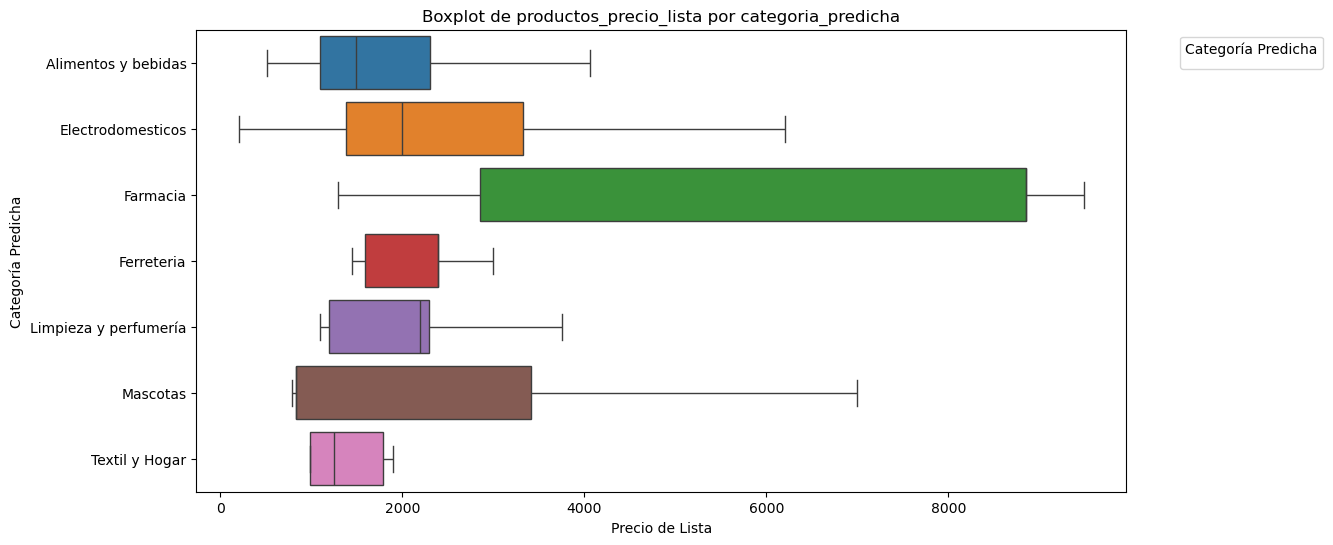

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=productos_carrefour_df, x='productos_precio_lista', y='categoria_predicha', hue='categoria_predicha', showfliers=False)
plt.title('Boxplot de productos_precio_lista por categoria_predicha (sin outliers)')
plt.xlabel('Precio de Lista')
plt.ylabel('Categoría Predicha')
plt.legend(title='Categoría Predicha', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/tmp/ipykernel_267763/1432125022.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Categoría Predicha', bbox_to_anchor=(1.05, 1), loc='upper left')


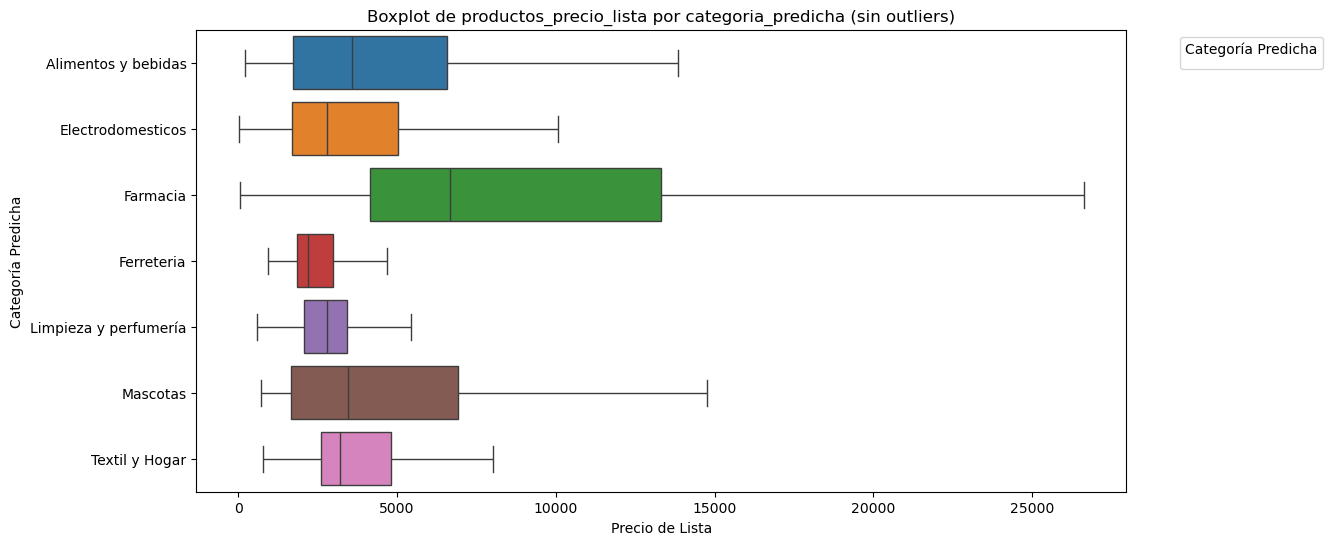

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=productos_otras_marcas_df, x='productos_precio_lista', y='categoria_predicha', hue='categoria_predicha', showfliers=False)
plt.title('Boxplot de productos_precio_lista por categoria_predicha (sin outliers)')
plt.xlabel('Precio de Lista')
plt.ylabel('Categoría Predicha')
plt.legend(title='Categoría Predicha', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Axes: xlabel='categoria_predicha', ylabel='productos_precio_lista'>

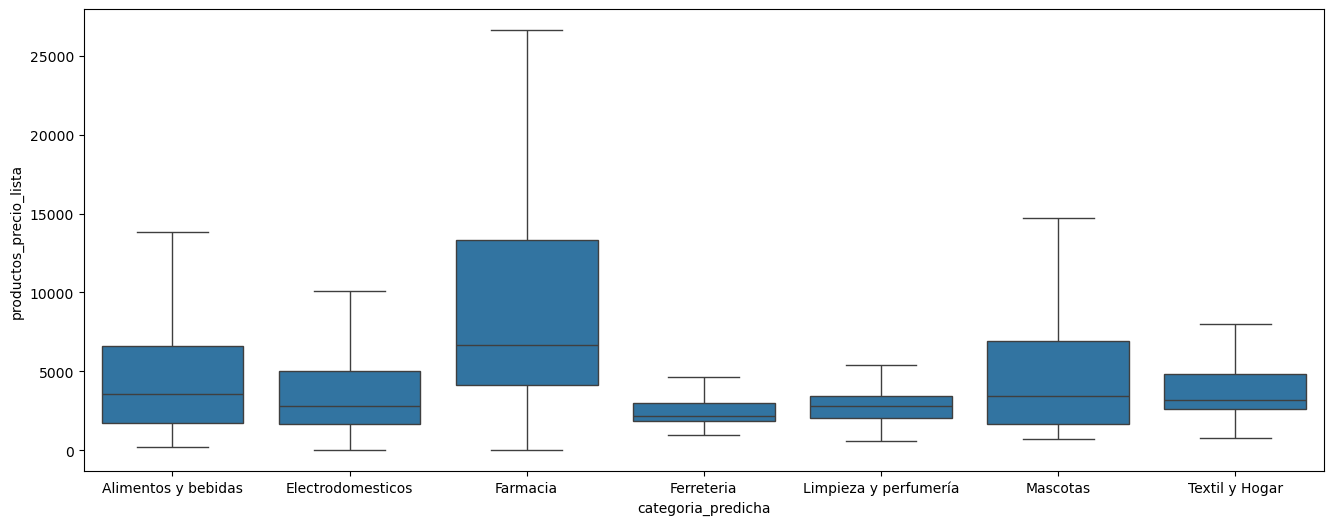

In [31]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=productos_otras_marcas_df, y='productos_precio_lista', x='categoria_predicha', showfliers=False)

<Axes: xlabel='categoria_predicha', ylabel='productos_precio_lista'>

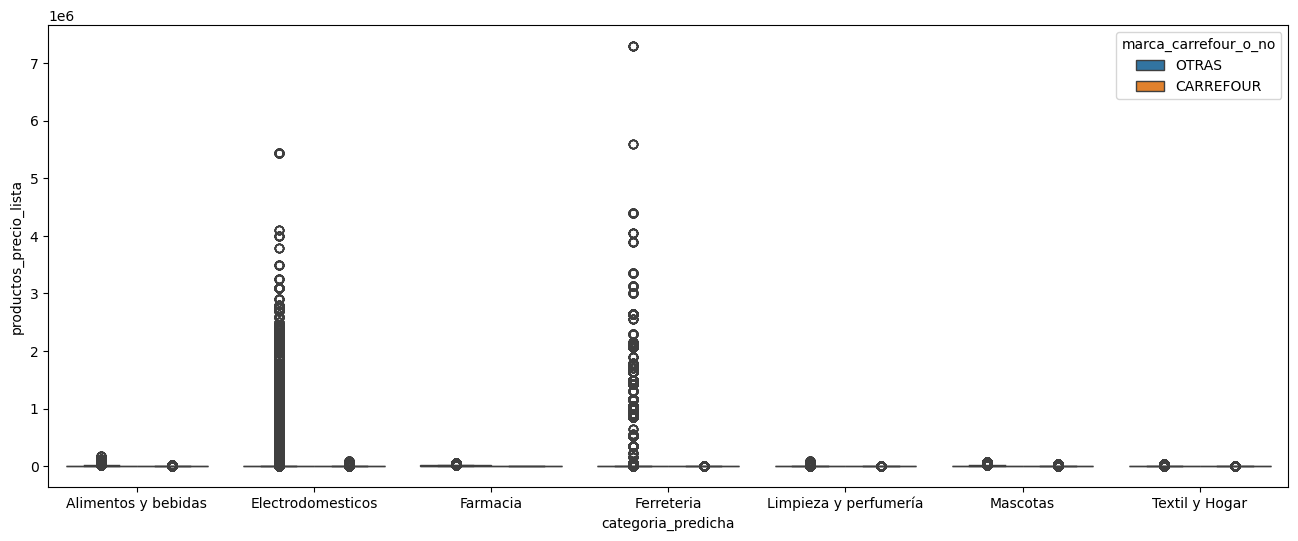

In [32]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=p3_df, y='productos_precio_lista', x='categoria_predicha', hue='marca_carrefour_o_no')


<Axes: xlabel='categoria_predicha', ylabel='productos_precio_lista'>

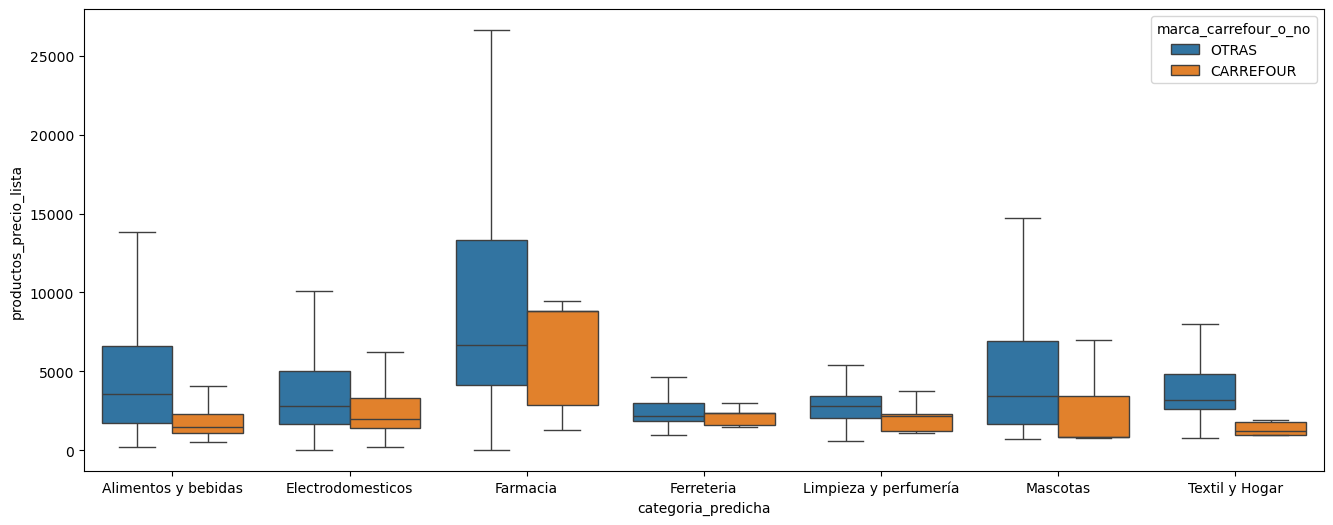

In [30]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=p3_df, y='productos_precio_lista', x='categoria_predicha', hue='marca_carrefour_o_no', showfliers=False)


TypeError: Axes.bxp() got an unexpected keyword argument 'labels'

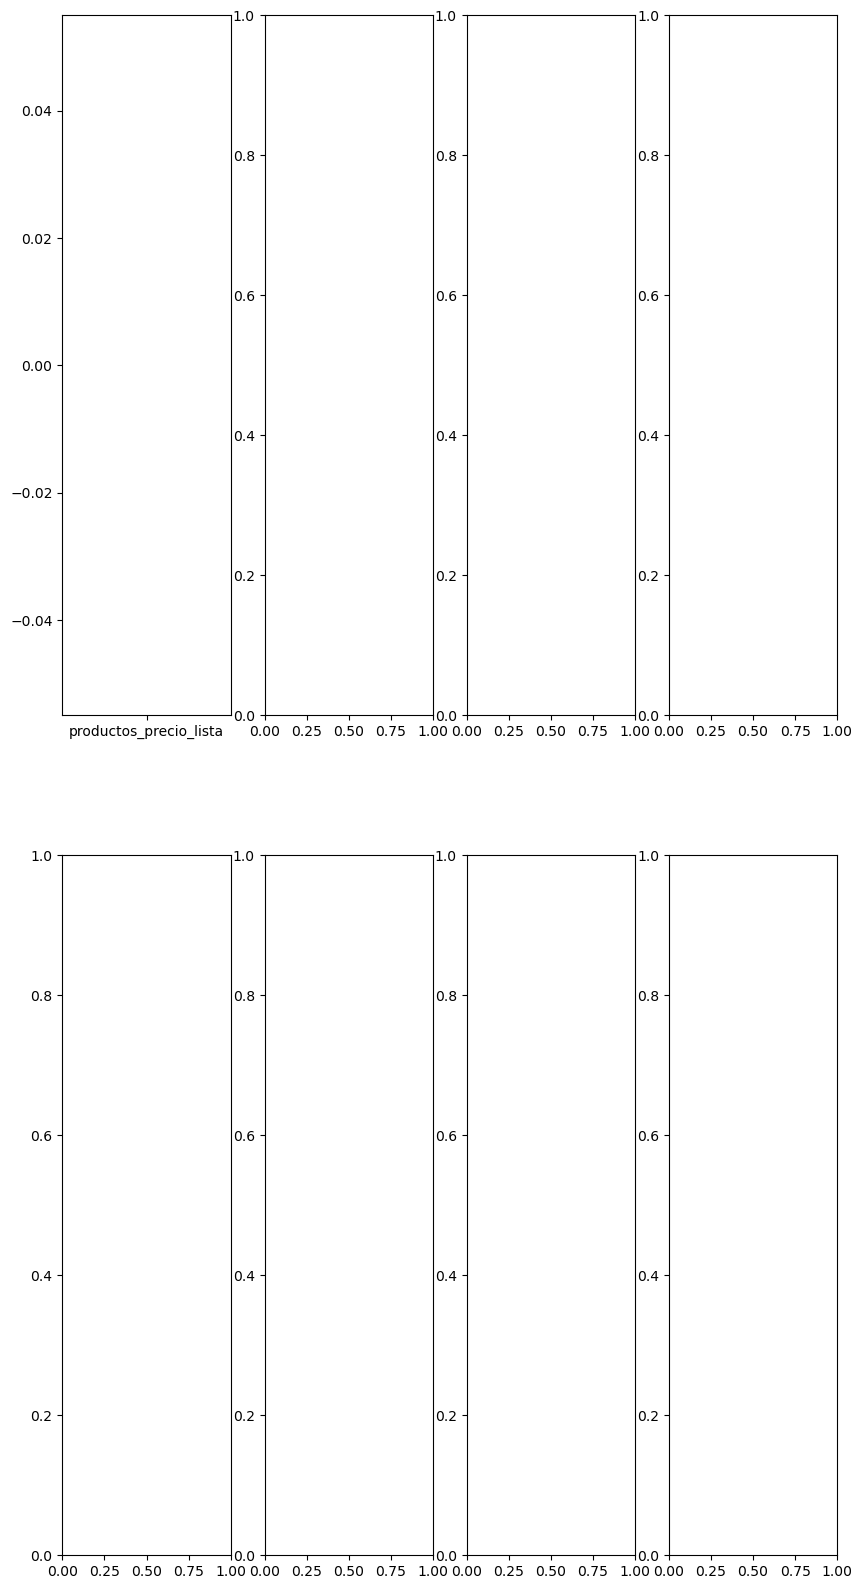

In [ ]:
# Obtener las categorías únicas de productos_otras_marcas_df['categoria_predicha']
categorias = productos_otras_marcas_df['categoria_predicha'].unique()

# Crear una figura de 4x4
fig, axes = plt.subplots(2, 4, figsize=(10, 20))
axes = axes.flatten()

# Iterar sobre las categorías y crear un boxplot para cada una
for i, categoria in enumerate(categorias):
    if i >= len(axes):
        break
    ax = axes[i]
    # Filtrar los datos por categoría
    otras_marcas_categoria = productos_otras_marcas_df[productos_otras_marcas_df['categoria_predicha'] == categoria]
    carrefour_categoria = productos_carrefour_df[productos_carrefour_df['categoria_predicha'] == categoria]

    tmp_df = pd.DataFrame({
        'Otras Marcas': otras_marcas_categoria['productos_precio_lista'].values,
        'Carrefour': carrefour_categoria['productos_precio_lista'].values
    })
    
    # Crear el boxplot
    sns.boxplot(data = tmp_df, x ax=ax)
    ax.set_title(f'Categoría: {categoria}')
    ax.set_xticklabels(['Otras Marcas', 'Carrefour'])
    ax.set_ylabel('Precio Lista')

    

# Ajustar el diseño
plt.tight_layout()
plt.show()

In [8]:
df_parquet.groupby(['fecha', 'productos_marca'], as_index=False).agg({
    'hubo_cambio_precio_fecha_anterior': 'sum',
    'productos_precio_lista': 'std',
    'id_producto': 'count'  
}).rename(columns={
    'id_producto': 'cantidad_productos',
}).sort_values(by='productos_precio_lista', ascending=False).head(10)

,fecha,productos_marca,hubo_cambio_precio_fecha_anterior,productos_precio_lista,cantidad_productos
1176,2025-04-01,S/D,0,333468.826543,115576
2654,2025-04-02,S/D,535,332807.673291,115561
4120,2025-04-03,S/D,193,330142.749944,117636
5591,2025-04-04,S/D,12576,329491.712302,117806
7070,2025-04-05,S/D,1953,329037.558859,118394
8552,2025-04-06,S/D,84,328085.222373,119281
10034,2025-04-07,S/D,13703,326519.847810,120743
6601,2025-04-05,KETER,0,57685.843419,62
8082,2025-04-06,KETER,0,57685.843419,62
5124,2025-04-04,KETER,0,57685.843419,62


In [171]:
df_parquet.head(10)

,id_comercio,id_bandera,id_sucursal,id_producto,productos_ean,productos_descripcion,productos_cantidad_presentacion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,...,productos_diferencia_precio_fecha_anterior,hubo_cambio_precio_fecha_anterior,sucursal_nombre,sucursal_tipo,sucursal_calle,sucursal_latitud,sucursal_longitud,sucursal_barrio,sucursal_localidad,sucursal_provincia
0,10,1,63,7790770601899,1,toalla nosotras clasicas c calendula x 16u,1.0,UNI,NOSOTRAS,2709.0,...,0.0,False,Caleta Olivia,Hipermercado,Humberto Beghin,-46.444906,-67.533789,NaN,Santa Cruz,AR-Z
1,10,3,711,7790070318398,1,fideos dedalitos lucchetti bolsa x 500 grs,1.0,UNI,LUCCHETTI,1339.0,...,0.0,False,Álvarez Thomas 372,Autoservicio,Av. Álvarez Thomas,-34.581280,-58.449050,Colegiales,Ciudad Autónoma de Buenos Aires,AR-C
2,10,1,44,7622201808860,1,galletitas boca de dama terrabusi x 170 grs,1.0,UNI,TERRABUSI,959.0,...,0.0,False,Resistencia II,Hipermercado,Av. Ávalos,-27.438800,-58.987383,NaN,Resistencia,AR-H
3,10,2,62,7791293050089,1,acondicionador liso efecto botox tresemme x 25...,1.0,UNI,TRESEMME,3969.0,...,0.0,False,Champagnat,Hipermercado,Panamericana Ramal Pilar,-34.449813,-58.916319,NaN,Pilar,AR-B
4,10,1,2,7791720018088,1,anana en rodajas bulnez lata x 825 grs,1.0,UNI,BULNEZ,2990.0,...,0.0,False,Vicente López,Hipermercado,Av. del Libertador,-34.532302,-58.468176,NaN,Vicente López,AR-B
5,10,2,130,7798151952981,1,mani tostado con cascara king x 175 grs,1.0,UNI,KING,1159.0,...,0.0,False,Mar del Plata Centro,Supermercado,Catamarca,-37.998923,-57.553648,NaN,Mar del Plata,AR-B
6,10,3,438,7791293045733,1,shampoo ceramidas sedal x 340 cc,1.0,UNI,SEDAL,4090.0,...,0.0,False,25 de Mayo 2650,Supermercado,25 de Mayo,-34.500302,-58.694886,NaN,Los Polvorines,AR-B
7,10,2,290,7790070933638,1,infusion a base de cafe arlistan pet x 170 grs,1.0,UNI,ARLISTAN,7650.0,...,0.0,False,Mendoza Bombal,Supermercado,Beltrán,-32.903094,-68.852428,NaN,Godoy Cruz,AR-M
8,10,3,482,7798108349161,1,atun al natural lomitos carrefour lata x 354 grs,1.0,UNI,CARREFOUR,5190.0,...,0.0,False,Sullivan 1597,Autoservicio,Alejandro Sullivan,-34.657250,-58.710554,NaN,San Antonio de Padua,AR-B
9,10,2,272,7790990999868,1,lavavajilla limon zorro botella x 500 cc,1.0,UNI,ZORRO,2099.0,...,0.0,False,San Fernando II,Supermercado,Av. Pdte. Tte. Gral. J. D. Perón,-34.441795,-58.553738,NaN,San Fernando,AR-B


In [19]:
df_parquet.describe(include='category')

,categoria_predicha,sucursal_tipo,sucursal_calle,sucursal_barrio,sucursal_localidad,sucursal_provincia
count,15557316,15557316,15557316,5374336,15557316,15557316
unique,7,3,384,75,125,22
top,Electrodomesticos,Autoservicio,Av. Rivadavia,Palermo,Ciudad Autónoma de Buenos Aires,AR-C
freq,12443501,6039342,366027,393564,6471290,6471290
